# Higgs Boson Detection - Extracting excotic particles

**Data Set Information:**

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.


**Attribute Information:**

The first column is the class label (1 for signal, 0 for background), followed by the 28 features (21 low-level features then 7 high-level features): lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. For more detailed information about each feature see the original paper.

*Ref : https://www.openml.org/search?type=data&status=active&id=4532*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ColabNotebooks/NN/CourseWork/HiggsDetection_NeuralComputing' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [ ]:
higgs_df = pd.read_csv(GOOGLE_DRIVE_PATH+'/phpZLgL9q.csv')
higgs_df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(98050, 29)

In [ ]:
X = higgs_df.drop(columns = 'class')
y = higgs_df['class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [ ]:
higgs_df = X_train
higgs_df['class'] = y_train
higgs_df.shape

(78440, 29)

In [ ]:
higgs_df.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,...,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
2803,2.893923,-0.523075,1.367595,1.396493,1.540824,0.984594,0.182177,-0.837606,0.000000,1.696927,...,-0.160634,1.550981,0.932532,0.688214,1.001004,0.897059,0.216582,0.807564,0.873755,0
92448,2.484349,0.380768,1.103481,1.055930,0.778968,0.877872,-1.934935,-0.767200,0.000000,1.001814,...,-0.719987809658051,3.10196137428284,1.11165702342987,1.11183655261993,0.991807520389557,0.878043174743652,1.18437457084656,1.89425218105316,2.22714495658875,0
50172,0.925843,-0.342891,0.395478,0.236633,1.192825,0.734507,-1.017982,0.125450,1.086538,0.727093,...,0.827767,0.0,0.865964,0.941258,0.989221,0.641156,1.197537,0.9792,0.880034,0
97304,1.622742,-0.256208,-1.667602,1.772357,-1.415502,2.115577,0.657487,0.353298,0.000000,1.520033,...,0.282288819551468,3.10196137428284,0.89704567193985,0.817460119724274,0.979682624340057,1.16535544395447,0.969430863857269,1.21790504455566,1.47284066677094,0
96449,0.494308,1.920612,-0.830871,1.064397,0.223475,0.712613,1.152602,0.201953,0.000000,1.059226,...,1.3149801492691,0,0.735607981681824,1.10610997676849,0.993869721889496,0.768157184123993,0.276932388544083,0.721551597118378,0.693636178970337,0


In [ ]:
higgs_df.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,jet2eta,jet2phi,jet2b-tag,jet3pt,jet3eta,jet3phi,jet3b-tag,jet4pt,jet4eta,class
count,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000,73537.000000
mean,0.989887,-0.003045,-0.005444,0.994044,-0.005757,0.988105,-0.005065,-0.000485,0.996024,0.992054,0.000804,0.005054,1.005874,0.994640,0.002411,0.003468,1.006614,0.985191,-0.004216,0.528509
std,0.561446,1.004373,1.006901,0.593334,1.007209,0.472703,1.008789,1.008782,1.027436,0.500371,1.003427,1.006696,1.049153,0.489903,1.009143,1.005892,1.196312,0.503057,1.009038,0.499190
min,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.140434,-2.968735,-1.741237,0.000000,0.188981,-2.913090,-1.742372,0.000000,0.263608,-2.728753,-1.742069,0.000000,0.365354,-2.497265,0.000000
25%,0.591485,-0.739296,-0.876925,0.576567,-0.880083,0.677802,-0.694177,-0.869205,0.000000,0.657216,-0.690586,-0.866295,0.000000,0.655419,-0.697078,-0.863923,0.000000,0.617281,-0.724184,0.000000
50%,0.854835,-0.002976,-0.003570,0.889649,-0.009631,0.893354,-0.001016,-0.004931,1.086538,0.889382,0.003946,0.009886,1.107436,0.898830,0.001993,0.003234,0.000000,0.870667,-0.007123,1.000000
75%,1.235311,0.736266,0.866000,1.288357,0.866276,1.168633,0.682243,0.872748,2.173076,1.199105,0.693621,0.879860,2.214872,1.224081,0.702885,0.875833,2.548224,1.220200,0.715767,1.000000
max,7.000281,2.433894,1.743236,7.074050,1.743213,7.064657,2.969674,1.741454,2.173076,8.280169,2.911267,1.743175,2.214872,8.509908,2.730009,1.742884,2.548224,7.705783,2.498009,1.000000


In [ ]:
higgs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73537 entries, 2803 to 92634
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lepton_pT                 73537 non-null  float64
 1   lepton_eta                73537 non-null  float64
 2   lepton_phi                73537 non-null  float64
 3   missing_energy_magnitude  73537 non-null  float64
 4   missing_energy_phi        73537 non-null  float64
 5   jet1pt                    73537 non-null  float64
 6   jet1eta                   73537 non-null  float64
 7   jet1phi                   73537 non-null  float64
 8   jet1b-tag                 73537 non-null  float64
 9   jet2pt                    73537 non-null  float64
 10  jet2eta                   73537 non-null  float64
 11  jet2phi                   73537 non-null  float64
 12  jet2b-tag                 73537 non-null  float64
 13  jet3pt                    73537 non-null  float64
 14  jet

In [ ]:
higgs_df['m_lv'].value_counts()

0.988105714321136    13
0.98750513792038     11
0.989273726940155    11
0.987684428691864    11
0.98950582742691     11
                     ..
1.14196169376373      1
1.62598371505737      1
1.046271443367        1
1.17211437225342      1
0.986775577068329     1
Name: m_lv, Length: 46365, dtype: int64

On analysis, it was identified that one record had values of '?' for columns jet4phi , jet4b-tag , m_jj , m_jjj , m_lv , m_jlv , m_bb , m_wbb','m_wwbb

The solution would be to remove that one record, as there are more than 90,000 records, the removal of this one record would not impact

In [ ]:
higgs_df = higgs_df[higgs_df['jet4phi'] != '?']

In [ ]:
temp_col = ['jet4phi','jet4b-tag','m_jj', 'm_jjj','m_lv','m_jlv', 'm_bb', 'm_wbb','m_wwbb']
for i in temp_col:
  higgs_df[i] = higgs_df[i].astype(float)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
higgs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78440 entries, 70570 to 92634
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lepton_pT                 78440 non-null  float64
 1   lepton_eta                78440 non-null  float64
 2   lepton_phi                78440 non-null  float64
 3   missing_energy_magnitude  78440 non-null  float64
 4   missing_energy_phi        78440 non-null  float64
 5   jet1pt                    78440 non-null  float64
 6   jet1eta                   78440 non-null  float64
 7   jet1phi                   78440 non-null  float64
 8   jet1b-tag                 78440 non-null  float64
 9   jet2pt                    78440 non-null  float64
 10  jet2eta                   78440 non-null  float64
 11  jet2phi                   78440 non-null  float64
 12  jet2b-tag                 78440 non-null  float64
 13  jet3pt                    78440 non-null  float64
 14  je

In [ ]:
higgs_df.skew()

lepton_pT                   1.728784
lepton_eta                  0.001857
lepton_phi                  0.000199
missing_energy_magnitude    1.473417
missing_energy_phi          0.006269
jet1pt                      1.926783
jet1eta                    -0.005140
jet1phi                     0.002865
jet1b-tag                   0.166342
jet2pt                      2.035213
jet2eta                    -0.001060
jet2phi                    -0.004792
jet2b-tag                   0.181471
jet3pt                      1.779549
jet3eta                     0.003308
jet3phi                    -0.004275
jet3b-tag                   0.430144
jet4pt                      1.699018
jet4eta                     0.007927
jet4phi                     0.007642
jet4b-tag                   0.773208
m_jj                        6.004986
m_jjj                       4.672780
m_lv                        4.695684
m_jlv                       2.790971
m_bb                        2.440266
m_wbb                       2.606528
m

In [ ]:
higgs_df['class'].value_counts()

1    38864
0    34672
Name: class, dtype: int64

**DATA BALANCE CHECK**

It can be observed that data is almost balanced with 53% of higgs signal and 47% of background


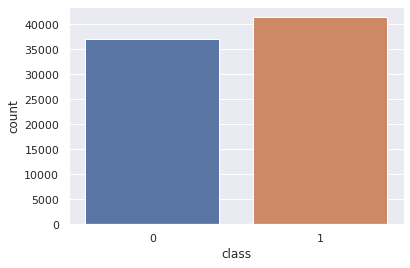

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class", data=higgs_df)

**CORELATION CHECK**

It is a good practice to check if data is corelated or not, it can be observed that few variables are corelated. these are the calculated variables.

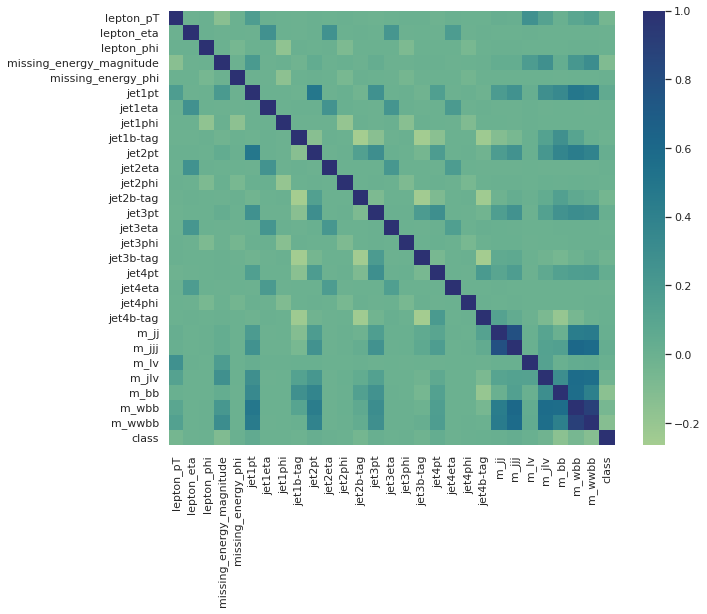

In [ ]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(higgs_df.corr(),cmap="crest", ax=ax)

**OUTLIERS CHECK**

Presence of outliers can skwe the model, hence removing outliers using Z-score and also seeting the score ina way that there is minimal loss of data

Text(0.5, 1.0, 'Box plot of Higgs - All data')

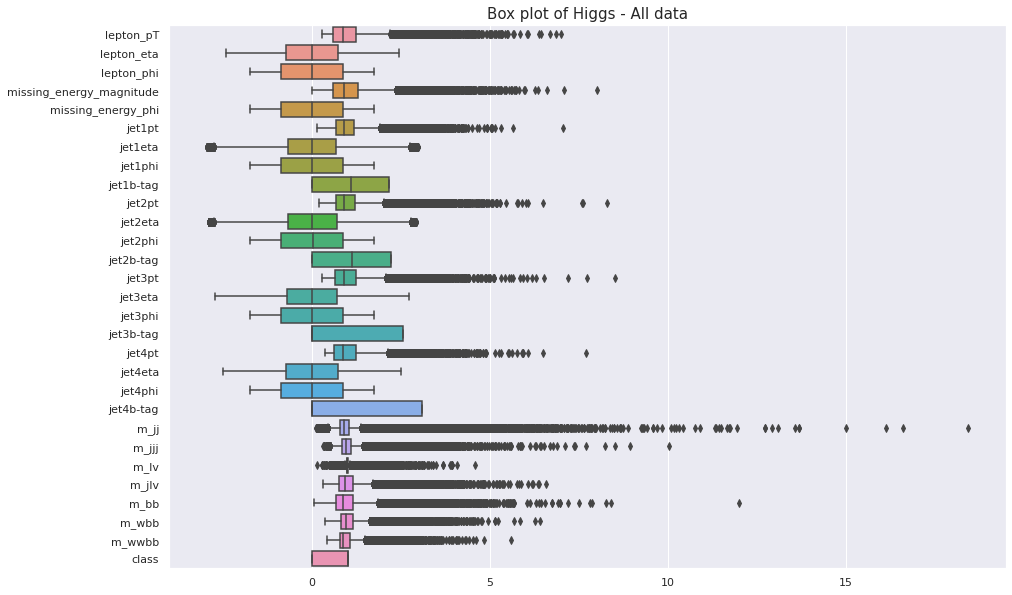

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=higgs_df, orient="h")
plt.title('Box plot of Higgs - All data',  fontsize = 15)

In [ ]:
from scipy import stats
zT  = np.abs(stats.zscore(higgs_df))
df_higgs_std = higgs_df[(zT < 6).all(axis =1)]
df_higgs_std.shape

(77006, 29)

Text(0.5, 1.0, 'Box plot of Higgs - Without outliers')

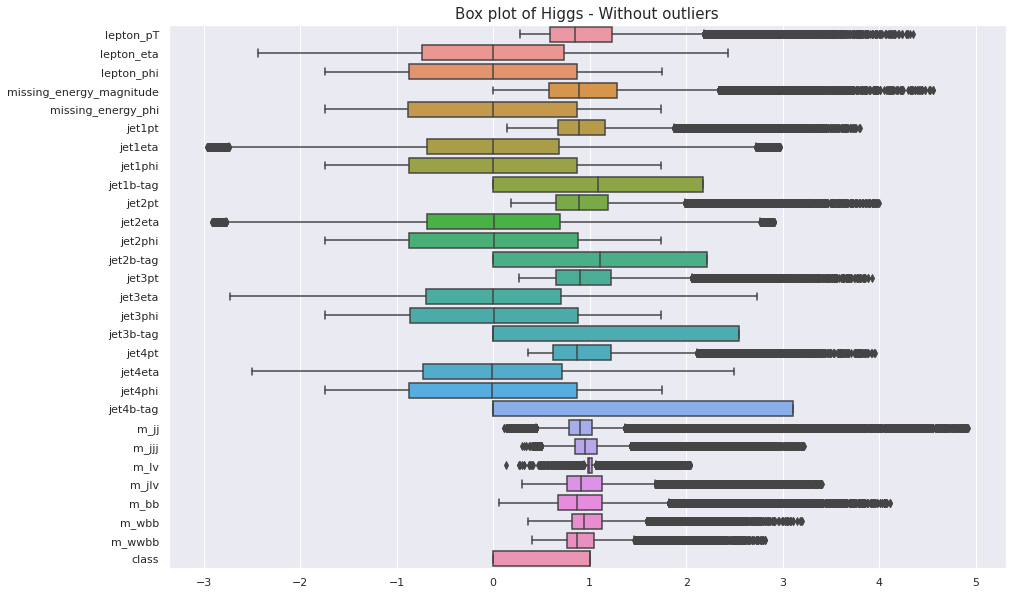

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_higgs_std, orient="h")
plt.title('Box plot of Higgs - Without outliers',  fontsize = 15)

In [ ]:
df_higgs_sample = higgs_df.sample(n = 8000)
df_higgs_sample.shape

(8000, 29)

PARALLEL COORDI

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(df_higgs_sample, color="class", 
                             )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn import preprocessing

norm_col = ['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b-tag',
       'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag', 'jet3pt', 'jet3eta',
       'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

# normalized = preprocessing.normalize(df_higgs_sample)
normalized = df_higgs_sample

# for i in norm_col : 
#   normalized[i] = preprocessing.normalize(normalized[i])

from sklearn.preprocessing import StandardScaler

normalized[norm_col] = preprocessing.normalize(normalized[norm_col])


In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(normalized, color="class", 
                             )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn import preprocessing

norm_col = ['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b-tag',
       'jet2pt', 'jet2eta', 'jet2phi', 'jet2b-tag', 'jet3pt', 'jet3eta',
       'jet3phi', 'jet3b-tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

df_higgs_m = df_higgs_sample[['class', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']]
fig = px.parallel_coordinates(df_higgs_m, color="class", 
                             )
fig.show()

In [ ]:
df_higgs_std.to_csv(GOOGLE_DRIVE_PATH+'/HiggsPreprocessedData.csv', index=False)

X_test.to_csv(GOOGLE_DRIVE_PATH+'/X_test_data.csv', index=False)
y_test.to_csv(GOOGLE_DRIVE_PATH+'/y_test_data.csv', index=False)

In [ ]:
X_test.shape

(19610, 28)

In [ ]:
y_test.shape

(19610,)

In [ ]:
df_higgs_std.shape

(77006, 29)